In [6]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

from os.path import join

%matplotlib inline

In [2]:
path_root = os.environ.get('DECIDENET_PATH')
path_parcellations = join(path_root, 'data/main_fmri_study/derivatives/parcellations') 
path_300_roi = join(path_parcellations, '300_ROI_Set/ROIs_300inVol_MNI_allInfo.txt')

df_roi = pd.read_csv(path_300_roi, sep=' ')
df_roi

,x,y,z,radius(mm),netWorkbenchLabel,netName,integrativePercent
0,-56.16,-44.76,-24.23,5,0,unassigned,0.0
1,-24.66,-97.84,-12.33,5,0,unassigned,0.0
2,8.13,41.12,-24.31,5,0,unassigned,0.0
3,26.68,-97.30,-13.49,5,0,unassigned,0.0
4,48.52,-2.85,-38.49,5,0,unassigned,0.0
...,...,...,...,...,...,...,...
295,7.50,-72.00,-39.00,4,10,SomatomotorDorsal,30.0
296,-10.00,-62.00,-18.00,4,11,SomatomotorLateral,0.0
297,10.00,-62.00,-18.00,4,11,SomatomotorLateral,0.0
298,-12.00,-44.00,-18.00,4,10,SomatomotorDorsal,35.0


In [ ]:
df = df_roi

n = len(df)

# Real distance between centres of the spheres
distance_mat = np.zeros((n, n))
for i in range(n):
    pos_1 = df.loc[i, ['x', 'y', 'z']]
    for j in range(i, n):
        pos_2 = df.loc[j, ['x', 'y', 'z']]
        distance_mat[i, j] = np.sqrt(np.sum(np.power(pos_1 - pos_2, 2)))
distance_mat = distance_mat + distance_mat.T

# Minimum required separation between spheres to avoid overlapping
separation_mat = df['radius(mm)'].values[:, np.newaxis] + \
                 df['radius(mm)'].values[np.newaxis, :]
np.fill_diagonal(separation_mat, 0)

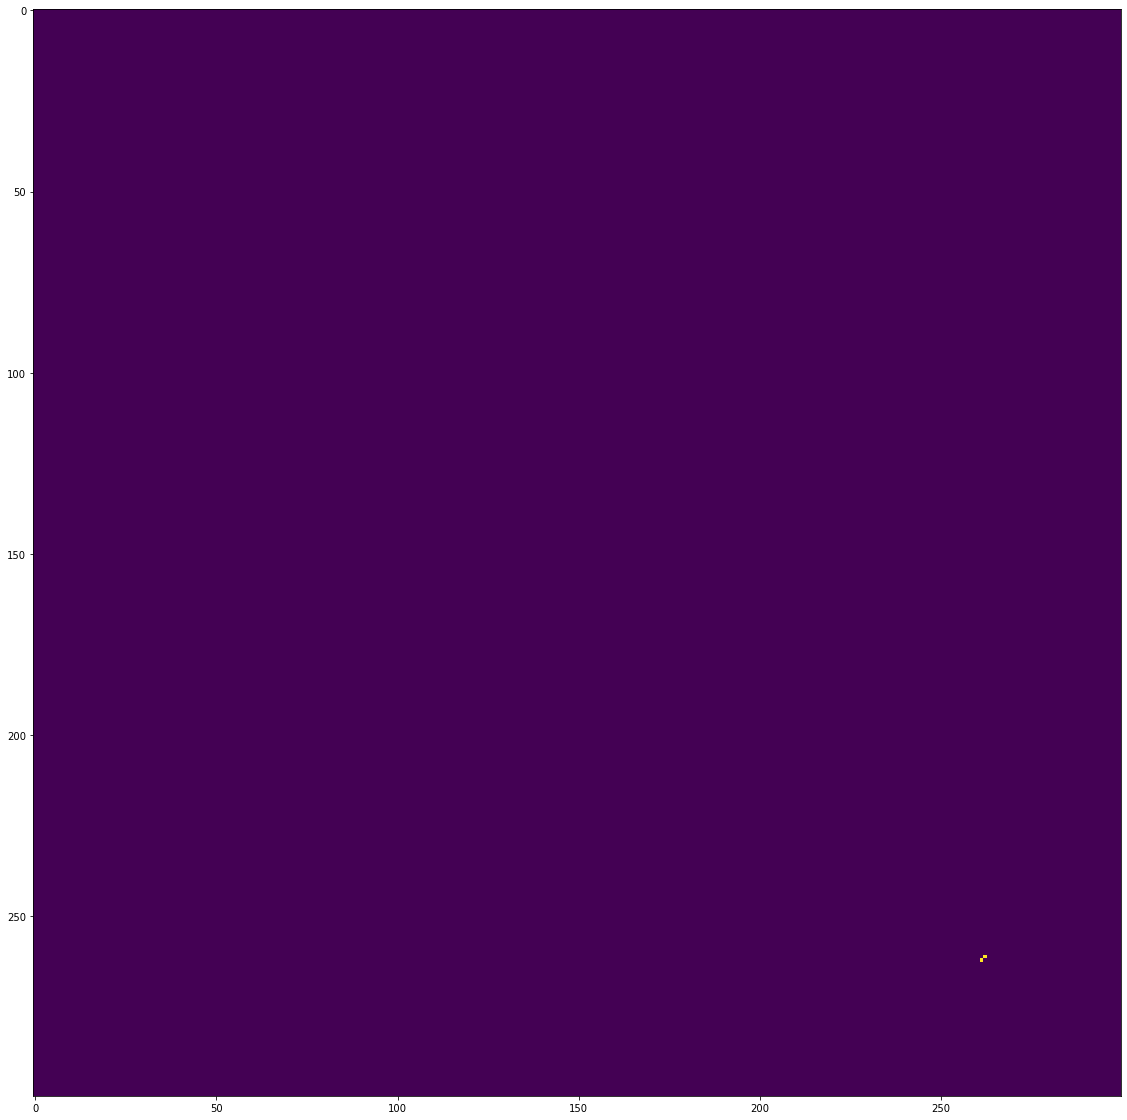

In [29]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(distance_mat < separation_mat)